# (시도) Eearthquake
> 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연, 최규빈

### imports

In [570]:
import tqdm
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from haversine import haversine
from IPython.display import HTML

### load data and clean it

`-` load

In [571]:
df= pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
df

,Date,Latitude,Longitude,Magnitude
0,01/02/1965,19.2460,145.6160,6.0
1,01/04/1965,1.8630,127.3520,5.8
2,01/05/1965,-20.5790,-173.9720,6.2
3,01/08/1965,-59.0760,-23.5570,5.8
4,01/09/1965,11.9380,126.4270,5.8
...,...,...,...,...
23407,12/28/2016,38.3917,-118.8941,5.6
23408,12/28/2016,38.3777,-118.8957,5.5
23409,12/28/2016,36.9179,140.4262,5.9
23410,12/29/2016,-9.0283,118.6639,6.3


https://www.weather.go.kr/w/eqk-vol/search/korea.do?schOption=&xls=0&startTm=2012-01-02&endTm=2022-06-17&startSize=2&endSize=&startLat=&endLat=&startLon=&endLon=&lat=&lon=&dist=&keyword=&dpType=m

In [572]:
df_korea= pd.read_csv('korea2.csv').rename(columns={'위도':'Latitude','경도':'Longitude','규모':'Magnitude'})
df_korea

,발생시각,Magnitude,Latitude,Longitude
0,2016/12/31 0:00,2.6,39.31,126.27
1,2016/12/30 0:00,2.5,38.64,125.76
2,2016/12/29 0:00,2.3,36.12,129.36
3,2016/12/29 0:00,2.6,38.71,125.76
4,2016/12/25 0:00,2.5,35.78,129.31
...,...,...,...,...
994,2000/04/12 0:00,3.5,36.90,125.30
995,2000/03/21 0:00,2.3,36.50,126.00
996,2000/03/15 0:00,2.5,36.30,125.90
997,2000/02/21 0:00,2.1,35.80,128.20


In [573]:
df_global= pd.concat([pd.read_csv('00_05.csv'),pd.read_csv('05_10.csv'),pd.read_csv('10_15.csv'),pd.read_csv('15_20.csv')]).iloc[:,[0,1,2,4]].rename(columns={'latitude':'Latitude','longitude':'Longitude','mag':'Magnitude'}).reset_index().iloc[:,1:]
df_global

,time,Latitude,Longitude,Magnitude
0,2005-12-31T12:14:02.240Z,-28.9880,-71.519000,5.00
1,2005-12-31T09:29:27.350Z,-27.1800,-176.434000,5.20
2,2005-12-30T18:26:43.900Z,7.5290,-82.266000,6.10
3,2005-12-29T08:30:34.480Z,27.3670,139.853000,5.30
4,2005-12-29T07:20:55.730Z,25.0100,96.197000,5.10
...,...,...,...,...
42809,2015-01-02T10:15:34.380Z,50.8632,-130.365400,5.40
42810,2015-01-02T08:25:52.660Z,6.4488,60.298500,5.40
42811,2015-01-02T08:21:55.900Z,6.5739,60.365300,5.50
42812,2015-01-01T12:16:14.570Z,40.4420,-125.774667,5.36


`-` cleaning

In [574]:
df.Date[df.Date == '1975-02-23T02:58:41.000Z']

3378    1975-02-23T02:58:41.000Z
Name: Date, dtype: object

In [575]:
df.iloc[3378,0] = '02/03/1975'

In [576]:
df.Date[df.Date == '1985-04-28T02:53:41.530Z']

7512    1985-04-28T02:53:41.530Z
Name: Date, dtype: object

In [577]:
df.iloc[7512,0] = '04/28/1985'

In [578]:
df.Date[df.Date == '2011-03-13T02:23:34.520Z']

20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object

In [579]:
df.iloc[20650,0] = '03/13/2011'

In [580]:
df= df.assign(Year=list(map(lambda x: x.split('/')[-1], df.Date))).iloc[:,1:]
df

,Latitude,Longitude,Magnitude,Year
0,19.2460,145.6160,6.0,1965
1,1.8630,127.3520,5.8,1965
2,-20.5790,-173.9720,6.2,1965
3,-59.0760,-23.5570,5.8,1965
4,11.9380,126.4270,5.8,1965
...,...,...,...,...
23407,38.3917,-118.8941,5.6,2016
23408,38.3777,-118.8957,5.5,2016
23409,36.9179,140.4262,5.9,2016
23410,-9.0283,118.6639,6.3,2016


In [581]:
df_korea = df_korea.assign(Year=list(map(lambda x: x.split('/')[0], df_korea.발생시각))).iloc[:,1:]
df_korea

,Magnitude,Latitude,Longitude,Year
0,2.6,39.31,126.27,2016
1,2.5,38.64,125.76,2016
2,2.3,36.12,129.36,2016
3,2.6,38.71,125.76,2016
4,2.5,35.78,129.31,2016
...,...,...,...,...
994,3.5,36.90,125.30,2000
995,2.3,36.50,126.00,2000
996,2.5,36.30,125.90,2000
997,2.1,35.80,128.20,2000


In [582]:
df_global = df_global.assign(Year=list(map(lambda x: x.split('-')[0], df_global.time))).iloc[:,1:]
df_global

,Latitude,Longitude,Magnitude,Year
0,-28.9880,-71.519000,5.00,2005
1,-27.1800,-176.434000,5.20,2005
2,7.5290,-82.266000,6.10,2005
3,27.3670,139.853000,5.30,2005
4,25.0100,96.197000,5.10,2005
...,...,...,...,...
42809,50.8632,-130.365400,5.40,2015
42810,6.4488,60.298500,5.40,2015
42811,6.5739,60.365300,5.50,2015
42812,40.4420,-125.774667,5.36,2015


In [583]:
df.Year.unique()

array(['1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972',
       '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016'], dtype=object)

In [584]:
df.Year = df.Year.astype(np.float64)

In [585]:
df_korea.Year = df_korea.Year.astype(np.float64)

In [586]:
df_global.Year = df_global.Year.astype(np.float64)

In [587]:
df_global = df_global.sort_values(by=['Year'])

### define class

In [588]:
class MooYaHo:
    def __init__(self,df):
        self.df = df 
        self.f = df.Magnitude.to_numpy()
        self.year = df.Year.to_numpy()
        self.lat = df.Latitude.to_numpy()
        self.long = df.Longitude.to_numpy()
        self.n = len(self.f)
        self.theta= None
    def get_distance(self):
        self.D = np.zeros([self.n,self.n])
        locations = np.stack([self.lat, self.long],axis=1)
        for i in tqdm.tqdm(range(self.n)):
            for j in range(i,self.n): 
                self.D[i,j]=haversine(locations[i],locations[j])
        self.D = self.D+self.D.T
    def get_weightmatrix(self,theta=1,beta=0.5,kappa=4000):
        self.theta = theta
        dist = np.where(self.D<kappa,self.D,0)
        self.W = np.exp(-(dist/self.theta)**2)
#         nlst = self.df.groupby('Year').aggregate(len).Latitude.tolist()
#         nlst = [0]+np.cumsum(nlst).tolist()
#         beta_matrix = np.zeros([self.n,self.n])
#         for i in range(len(nlst)-1):
#             beta_matrix[nlst[i]:nlst[i+1],nlst[i]:nlst[i+1]] = beta
#         self.W = self.W * beta_matrix 
#     def _get_laplacian(self):
#         self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
#         self.lamb, self.Psi = np.linalg.eigh(self.L)
#         self.Lamb = np.diag(self.lamb)  

    def _eigen(self):
        d= self.W.sum(axis=1)
        D= np.diag(d)
        self.L = np.diag(1/np.sqrt(d)) @ (D-self.W) @ np.diag(1/np.sqrt(d))
        self.lamb, self.Psi = np.linalg.eigh(self.L)
        self.Lamb = np.diag(self.lamb)        
    def fit(self,m):
        self._eigen()
        self.fhat = self.Psi[:,0:m]@self.Psi[:,0:m].T@self.f
        self.df = self.df.assign(MagnitudeHat = self.fhat)
        self.df = self.df.assign(Residual = self.df.Magnitude- self.df.MagnitudeHat)
        plt.plot(self.f,'.')
        plt.plot(self.fhat,'x')
        
    def vis(self,MagThresh=7,ResThresh=1):
        fig = px.density_mapbox(self.df, 
                        lat='Latitude', 
                        lon='Longitude', 
                        z='Magnitude',
                        animation_frame="Year",animation_group="Year",
                        radius=15,
                        center=dict(lat=37, lon=160), 
                        zoom=1.5,
                        height=900,
                        opacity = 0.3,
                        mapbox_style="stamen-terrain")
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.add_scattermapbox(lat = self.df.query('Magnitude > @MagThresh')['Latitude'],
                      lon = self.df.query('Magnitude > @MagThresh')['Longitude'],
                      marker_size= 8,
                      marker_color= 'red',
                      opacity = 1
                      )
        fig.add_scattermapbox(lat = self.df.query('Residual**2 > @ResThresh')['Latitude'],
                      lon = self.df.query('Residual**2 > @ResThresh')['Longitude'],
                      marker_size= 8,
                      marker_color= 'blue',
                      opacity = 1
                      )
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))

### analysis

`-` make instance for analysis

In [485]:
moo=MooYaHo(df.query("Year >= 2010"))

- 테스트용으로 2016년 자료만 수집

`-` get distance 

In [486]:
moo.get_distance()

100%|██████████| 3574/3574 [00:15<00:00, 233.13it/s] 


In [487]:
moo.D[moo.D>0].mean()

8716.421563562202

- 0이 아닌 거리의 평균은 8600정도?

(array([1150424., 1296390., 1778470., 1844656., 1636686., 1500852.,
        1388466.,  983160.,  974240.,  216558.]),
 array([9.12695937e-02, 2.00065540e+03, 4.00121954e+03, 6.00178367e+03,
        8.00234781e+03, 1.00029119e+04, 1.20034761e+04, 1.40040402e+04,
        1.60046043e+04, 1.80051685e+04, 2.00057326e+04]),
 <BarContainer object of 10 artists>)

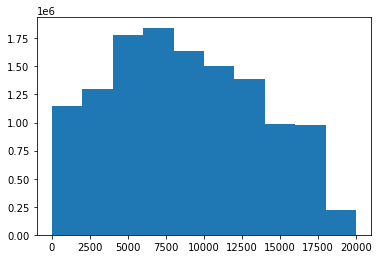

In [488]:
plt.hist(moo.D[moo.D>0])

- 히스토그램결과 -> 2500보다 거리가 작으면 거의 같은 지역이라고 봐도 무방할듯

`-` weight matrix

In [489]:
moo.get_weightmatrix(theta=(8647.92),kappa=3000) 

- 평균적으로 노드는 `np.exp(-(dist/8647)**2)=np.exp(-1)=0.36787944117144233` 정도의 연결강도를 가진다. 
- 거리가 2500이하이면 weight를 1로 설정한다. 

`-` fit

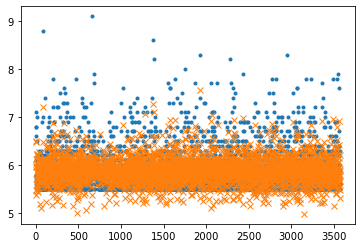

In [490]:
moo.fit(m=1200)

In [491]:
moo.df.query('Year==2010 & Latitude == 18.443')

,Latitude,Longitude,Magnitude,Year,MagnitudeHat,Residual
19856,18.443,-72.571,7.0,2010.0,6.203242,0.796758


`-` Residual ; m & theta 의 조합 2010년 이후 아이티 기준
- m: 1000, kappa: 2000, Residual: 1.227006
- m: 1000, kappa: 2500, Residual: 1.009784
- m: 800, kappa: 2750, Residual: 1.022774
- m: kappa: Residual:
- m: kappa: Residual:

`-` vis

In [1]:
#moo.vis(MagThresh=7,ResThresh=1.4) # <- 실행해봐요

- 전체자료는 underlying에 위치 
- 지진강도가 MagThresh 이상인 자료는 붉은점으로 시각화함 
- 이상치정도(우리가 제안하는 새로운 메져) ResThresh 이상인 자료는 파란점으로 시각화함 

### 한계점 (?)

`-` 시간효과를 따로 모형화하지는 않음 

---

In [143]:
pd.read_html('https://ko.wikipedia.org/wiki/%EC%A7%80%EC%A7%84_%EB%AA%A9%EB%A1%9D',encoding='utf-8')[0].iloc[[1,2,3],:] # 가장 피해가 컸던 지진

,순위,일자,장소,이름,사망자,규모,비고
1,2,1976년 7월 28일,중국 탕산,탕산지진,"255,000 (공식)",7.5,NaN
2,3,2010년 1월 12일,아이티,2010년 아이티 지진,"230,000 이상",7.0,NaN
3,4,2004년 12월 26일,인도네시아 수마트라섬,2004년 인도양 지진 해일,230210,9.1-9.3,NaN


In [146]:
pd.read_html('https://ko.wikipedia.org/wiki/%EC%A7%80%EC%A7%84_%EB%AA%A9%EB%A1%9D',encoding='utf-8')[1].iloc[[2,3,8],:]# 가장 규모가 컸던 지진

,순위,일자,장소,이름,규모
2,3,2004년 12월 26일,인도네시아 수마트라섬,2004년 인도양 지진 해일,9.1-9.2
3,4,2011년 3월 11일,일본 산리쿠 해역,2011년 도호쿠 지방 태평양 앞바다 지진,9.1
8,6 (공동),2010년 2월 27일,칠레 마울레주 해역,2010년 칠레 지진,8.8


In [147]:
pd.read_html('https://ko.wikipedia.org/wiki/2016%EB%85%84_%EC%A7%80%EC%A7%84#cite_note-1',encoding='utf-8')[2] # 2006년부터 2016년까지의 세계 지진 발생 수

,매그니튜드,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년
0,8.0–9.9,2,4,0,1,1,1,2,2,1,1,0
1,7.0–7.9,9,14,12,16,23,19,14,17,11,18,16
2,6.0–6.9,142,178,167,144,151,187,117,123,143,127,130
3,5.0–5.9,1731,2090,1790,1920,2221,2486,1546,1454,1574,1412,1550
4,4.0–4.9,12861,12086,12306,6835,10140,13131,10957,11872,15816,13776,13699
5,합계,14746,14372,14277,8917,12539,15824,12637,13469,17545,15334,15395


https://www.usgs.gov/programs/earthquake-hazards/lists-maps-and-statistics

In [148]:
pd.read_html('https://www.usgs.gov/programs/earthquake-hazards/science/20-largest-earthquakes-world',encoding='utf-8')[1].iloc[[2,3,5,7,9,10,17,18],:] # A list of the 20 largest earthquakes in the world.

,No.,Mag,Location,Alternative Name,Date (UTC),Time (UTC),Latitude,Longitude,References
2,3.0,9.1,Off the West Coast of Northern Sumatra,"Sumatra-Andaman Islands Earthquake, 2004 Sumat...",2004-12-26,00:58,3.30°N,95.98°E,"Duputel et al., 2012"
3,4.0,9.1,"Near the East Coast of Honshu, Japan",Tohoku Earthquake,2011-03-11,05:46,38.30°N,142.37°E,"Duputel et al., 2012"
5,6.0,8.8,"Offshore Bio-Bio, Chile",Maule Earthquake,2010-02-27,06:34,36.12°S,72.90°W,"Duputel et al., 2012"
7,8.0,8.7,"Rat Islands, Aleutian Islands, Alaska",Rat Islands Earthquake,1965-02-04,05:01,51.25°N,178.72°E,"Kanamori & Anderson, 1975"
9,10.0,8.6,Off the West Coast of Northern Sumatra,NaN,2012-04-11,08:39,2.33°N,93.06°E,"Duputel et al., 2012"
10,11.0,8.6,"Northern Sumatra, Indonesia",Nias Earthquake,2005-03-28,16:10,2.09°N,97.11°E,NEIC
17,18.0,8.4,"Southern Sumatra, Indonesia",NaN,2007-09-12,11:10,4.44°S,101.37°E,NEIC
18,19.0,8.4,Near the Coast of Southern Peru,"Arequipa, Peru Earthquake",2001-06-23,20:33,16.27°S,73.64°W,"Duputel et al., 2012"


---

`-` 예상: 특정 진도 이상이면서 residual 1보다 큰 곳이 의미있는 지점일 것이다.

`-` 1976년
- 중국 탕산 지진, 일어난 3곳 ( 2곳은 residual 1초과)

`-` 2004년
- 인도 수마트라섬 지진, 9 이상인 점(red)과 residual 1 초과인 점(blue)이 겹침
- 때때로 해구에 도달하는 지진에서 섭입판 경계면이 파열되어 1907년, 2004년, 2010년과 같은 대형 쓰나미가 발생한다. (https://ko.wikipedia.org/wiki/2022%EB%85%84_%EC%88%98%EB%A7%88%ED%8A%B8%EB%9D%BC_%EC%A7%80%EC%A7%84)

`-` 2010년
- 아이티지진(7.0)(지정한 MagThresh 기준은 초과이므로 6.9정도 넣고 돌림)
- 칠레 마줄레주해역 지진(8.8)

`-` 2011년
- 진도 9 이상 일본 한 건, 진도가 9이면서 residual이 1 초과인 1곳 존재

`-` 2016년
- 경주 지진 있던 해, 진도가 5.4 이상, 해당 데이터가 존재하지 않아 지도에도 표시되지 않음(한국의 지진 데이터가 없는 것 같다.)

---

### analysis_Korea

In [635]:
class MooKR(MooYaHo):
    def vis(self,MagThresh=7,ResThresh=1):
        fig = px.density_mapbox(self.df, 
                        lat='Latitude', 
                        lon='Longitude', 
                        z='Magnitude',
                        animation_frame="Year",animation_group="Year",
                        radius=15,
                        center=dict(lat=37, lon=126), 
                        zoom=5.7,
                        height=900,
                        opacity = 0.3,
                        mapbox_style="stamen-terrain")
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        fig.add_scattermapbox(lat = self.df.query('Magnitude > @MagThresh')['Latitude'],
                      lon = self.df.query('Magnitude > @MagThresh')['Longitude'],
                      marker_size= 8,
                      marker_color= 'red',
                      opacity = 1
                      )
        fig.add_scattermapbox(lat = self.df.query('Residual**2 > @ResThresh')['Latitude'],
                      lon = self.df.query('Residual**2 > @ResThresh')['Longitude'],
                      marker_size= 8,
                      marker_color= 'blue',
                      opacity = 1
                      )
        return HTML(fig.to_html(include_mathjax=False, config=dict({'scrollZoom':False})))

`-` make instance for analysis

In [636]:
moo_korea=MooKR(df_korea)

`-` get distance 

In [637]:
moo_korea.get_distance()

100%|██████████| 999/999 [00:01<00:00, 791.94it/s] 


In [638]:
moo_korea.D[moo_korea.D>0].mean()

272.5292362407177

(array([1.35880e+05, 1.96406e+05, 1.89208e+05, 2.00592e+05, 1.73846e+05,
        7.20240e+04, 2.17020e+04, 3.53800e+03, 9.46000e+02, 8.40000e+01]),
 array([8.63047808e-01, 9.43702012e+01, 1.87877355e+02, 2.81384508e+02,
        3.74891661e+02, 4.68398815e+02, 5.61905968e+02, 6.55413122e+02,
        7.48920275e+02, 8.42427428e+02, 9.35934582e+02]),
 <BarContainer object of 10 artists>)

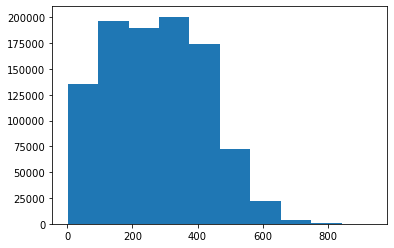

In [639]:
plt.hist(moo_korea.D[moo_korea.D>0])

`-` weight matrix

In [640]:
moo_korea.get_weightmatrix(theta=(217.66709),kappa=1000) 

`-` fit

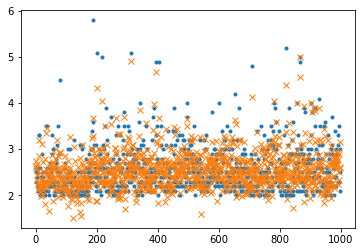

In [641]:
moo_korea.fit(m=700)

In [642]:
moo_korea.df.query('Residual>=1').iloc[:,:] 

,Magnitude,Latitude,Longitude,Year,MagnitudeHat,Residual
81,4.5,35.74,129.18,2016.0,2.945205,1.554795
187,5.8,35.76,129.19,2016.0,3.290449,2.509551
229,3.9,36.02,126.95,2015.0,2.898130,1.001870
404,4.9,35.16,124.56,2013.0,3.687209,1.212791
602,4.0,36.56,128.71,2009.0,2.973552,1.026448


경주는 Latitude 35.7808 Longitude 129.2162 이 정도의 위치!

`-` vis

In [653]:
#moo_korea.vis(MagThresh=5,ResThresh=1) # <- 실행해봐요

---

### analysis_Global

`-` make instance for analysis

In [497]:
moo_global=MooYaHo(df_global.query('Year>=2010'))

`-` get distance 

In [498]:
moo_global.get_distance()

100%|██████████| 23737/23737 [11:05<00:00, 35.68it/s] 


In [499]:
moo_global.D[moo_global.D>0].mean()

8817.41643144456

(array([48831448., 59449960., 75911578., 79513042., 70598224., 66424030.,
        61067528., 48832394., 43150940.,  9634370.]),
 array([2.54728455e-02, 2.00145292e+03, 4.00288038e+03, 6.00430783e+03,
        8.00573528e+03, 1.00071627e+04, 1.20085902e+04, 1.40100176e+04,
        1.60114451e+04, 1.80128725e+04, 2.00143000e+04]),
 <BarContainer object of 10 artists>)

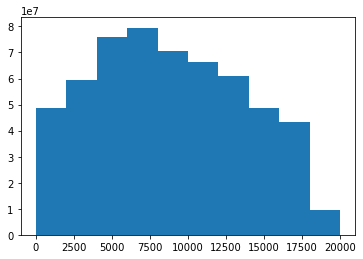

In [500]:
plt.hist(moo_global.D[moo_global.D>0])

`-` weight matrix

In [516]:
moo_global.get_weightmatrix(theta=(8268.6226),kappa=4000) 

`-` fit

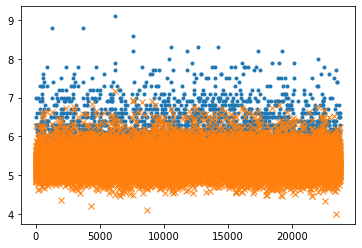

In [527]:
moo_global.fit(m=10000)

`-` vis

In [528]:
moo_global.df.query('Year==2010 & Latitude == 18.443')

,Latitude,Longitude,Magnitude,Year,MagnitudeHat,Residual
33065,18.443,-72.571,7.0,2010.0,5.985154,1.014846
11356,18.443,-72.571,7.0,2010.0,5.763248,1.236752


In [529]:
#moo_global.vis(MagThresh=9,ResThresh=1) # <- 실행해봐요

In [652]:
nn= 18*10000
np.zeros([nn,nn])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])